# 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢  
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

今日百日馬拉松作業 : 注意事項

1. 今日作業記憶體需求較大, 請同學執行時記得 shutdown 其他執行中的 .ipynb 檔

2. 提醒同學們今日執行會比較久(幾分鐘到數小時不等)

### (1)請將 Epoch 加到 500 個，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="sigmoid")(x)
    x = keras.layers.Dense(units=128, activation="tanh")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()


W0805 10:49:44.696193 140489855690624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 10:49:44.746504 140489855690624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 10:49:44.755573 140489855690624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile 模型
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0805 10:50:02.047356 140489855690624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 10:50:02.064463 140489855690624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
#設定要訓練的 Epoch 數
model.fit(x_train, 
          y_train, 
          epochs = 500, #作業規定...跑更久了 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0805 10:50:04.010902 140489855690624 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 10:50:04.085304 140489855690624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 14s 278us/step - loss: 1.9133 - acc: 0.3032 - val_loss: 1.7087 - val_acc: 0.3836
Epoch 2/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.6676 - acc: 0.4023 - val_loss: 1.6206 - val_acc: 0.4098
Epoch 3/500
50000/50000 [==============================] - 13s 260us/step - loss: 1.5713 - acc: 0.4359 - val_loss: 1.5536 - val_acc: 0.4391
Epoch 4/500
50000/50000 [==============================] - 13s 263us/step - loss: 1.5114 - acc: 0.4580 - val_loss: 1.5079 - val_acc: 0.4569
Epoch 5/500
50000/50000 [==============================] - 13s 266us/step - loss: 1.4671 - acc: 0.4739 - val_loss: 1.4609 - val_acc: 0.4746
Epoch 6/500
50000/50000 [==============================] - 13s 266us/step - loss: 1.4324 - acc: 0.4875 - val_loss: 1.4718 - val_acc: 0.4658
Epoch 7/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.3966 - acc: 0.4995 - val_l

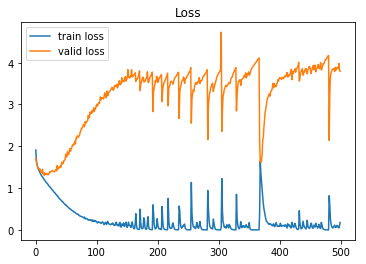

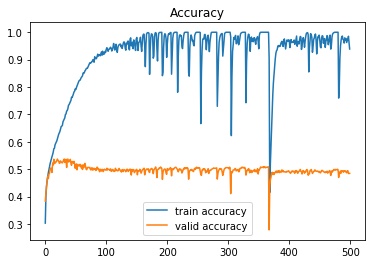

In [7]:
import matplotlib.pyplot as plt
# 以視覺化方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

訓練集的損失下降比驗證集的損失下降來的快，且驗證集的損失隨著訓練時間增加而上升  
→over fitting

### 2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
# Compile 模型
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
#設定要訓練的 Epoch 數
model.fit(x_train, 
          y_train, 
          epochs = 100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.0965 - acc: 0.9658 - val_loss: 3.7488 - val_acc: 0.4916
Epoch 2/100
50000/50000 [==============================] - 10s 209us/step - loss: 0.0576 - acc: 0.9817 - val_loss: 3.7437 - val_acc: 0.4941
Epoch 3/100
50000/50000 [==============================] - 10s 210us/step - loss: 0.0429 - acc: 0.9879 - val_loss: 3.7430 - val_acc: 0.4971
Epoch 4/100
50000/50000 [==============================] - 10s 207us/step - loss: 0.0351 - acc: 0.9913 - val_loss: 3.7437 - val_acc: 0.4964
Epoch 5/100
50000/50000 [==============================] - 10s 208us/step - loss: 0.0302 - acc: 0.9933 - val_loss: 3.7449 - val_acc: 0.4976
Epoch 6/100
50000/50000 [==============================] - 11s 213us/step - loss: 0.0269 - acc: 0.9943 - val_loss: 3.7463 - val_acc: 0.4978
Epoch 7/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.0245 - acc: 0.9951 - val_l

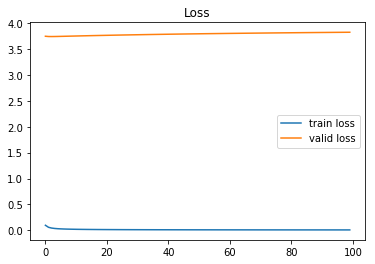

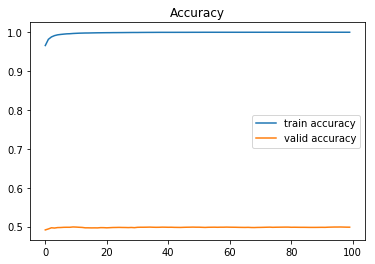

In [10]:
import matplotlib.pyplot as plt
# 以視覺化方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# 範例重點
學會從 Keras 內建函式取得資料  
能夠建立簡易的深度學習模型  
觀察並了解 Overfit 現象

In [0]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0804 16:41:48.864763 140139191748480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 16:41:48.884290 140139191748480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 16:41:48.889217 140139191748480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 16:41:48.950138 140139191748480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 16:41:48.959205 140139191748480 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, #也太多...跑好久
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0804 16:41:54.011726 140139191748480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0804 16:41:54.063920 140139191748480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 218us/step - loss: 1.9192 - acc: 0.3056 - val_loss: 1.7643 - val_acc: 0.3640
Epoch 2/100
50000/50000 [==============================] - 10s 207us/step - loss: 1.7080 - acc: 0.3887 - val_loss: 1.6791 - val_acc: 0.3956
Epoch 3/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.6237 - acc: 0.4197 - val_loss: 1.5677 - val_acc: 0.4415
Epoch 4/100
50000/50000 [==============================] - 10s 207us/step - loss: 1.5551 - acc: 0.4473 - val_loss: 1.5560 - val_acc: 0.4440
Epoch 5/100
50000/50000 [==============================] - 11s 210us/step - loss: 1.5094 - acc: 0.4606 - val_loss: 1.4778 - val_acc: 0.4741
Epoch 6/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.4586 - acc: 0.4811 - val_loss: 1.5206 - val_acc: 0.4524
Epoch 7/100
50000/50000 [==============================] - 10s 210us/step - loss: 1.4417 - acc: 0.4880 - val_l

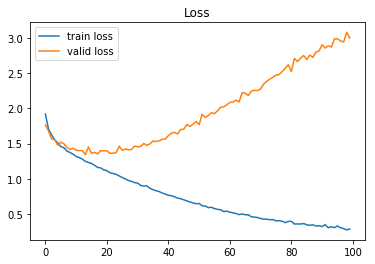

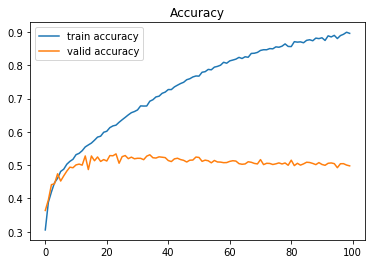

In [0]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

參考資料

  - [Overfitting – Coursera 日誌](https://medium.com/@ken90242/machine-learning%E5%AD%B8%E7%BF%92%E6%97%A5%E8%A8%98-coursera%E7%AF%87-week-3-4-the-c05b8ba3b36f)  
  - [EliteDataScience – Overfitting](https://elitedatascience.com/overfitting-in-machine-learning#signal-vs-noise)  
  - [Overfitting vs. Underfitting](https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765)